# 4. Rispondere alle domande
Trasforma le seguenti richiesti in formule per estrarre infromazioni dal dataframe
- Mostrami le vendite maggiori di 10

- Mostrami i dati del 2018

- Mostrami le vendite maggiori di 13 e l'anno è il 2018

- Mostrami tutto TRANNE i casi in cui le vendite sono maggiori di 13 e l'anno è il 2018

- Mostrami i dati dove le vendite divise per 3 sono maggiori di 3

- Mostrami i dipendenti i cui nomi sono alfabeticamente dopo la J



In [2]:
import pandas as pd

sales = pd.DataFrame(
    data={
        "employee": [
            "Katrina",
            "Guanyu",
            "Jan",
            "Roman",
            "Jacqueline",
            "Paola",
            "Esperanza",
            "Alaina",
            "Egweyn",
        ],
        "sales": [14, 17, 6, 12, 8, 3, 7, 15, 5],
        "year": [2018, 2019, 2020, 2018, 2020, 2019, 2019, 2020, 2020],
    }
)
sales

,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
2,Jan,6,2020
3,Roman,12,2018
4,Jacqueline,8,2020
5,Paola,3,2019
6,Esperanza,7,2019
7,Alaina,15,2020
8,Egweyn,5,2020


In [3]:
sales.query("sales > 10")

,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
3,Roman,12,2018
7,Alaina,15,2020


In [4]:
sales.query("year == 2018")

,employee,sales,year
0,Katrina,14,2018
3,Roman,12,2018


In [5]:
sales.query("sales > 13 and year==2018")

,employee,sales,year
0,Katrina,14,2018


In [6]:
sales.query("sales < 13 or year!=2018")

,employee,sales,year
1,Guanyu,17,2019
2,Jan,6,2020
3,Roman,12,2018
4,Jacqueline,8,2020
5,Paola,3,2019
6,Esperanza,7,2019
7,Alaina,15,2020
8,Egweyn,5,2020


In [7]:
sales.query("sales/3 > 3")

,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
3,Roman,12,2018
7,Alaina,15,2020


In [8]:
sales.query("employee > 'K'")

,employee,sales,year
0,Katrina,14,2018
3,Roman,12,2018
5,Paola,3,2019


# 5. Analisi di un dataset di video giochi
1. Quanti videogiochi sono stati pubblicati
2. Quali sono i generi più popolari? Mostralo con un bar plot
3. Plotta l'evoluzione del numero di giochi pubblicati nel tempo
4. Prova a riprodurre questo plot 
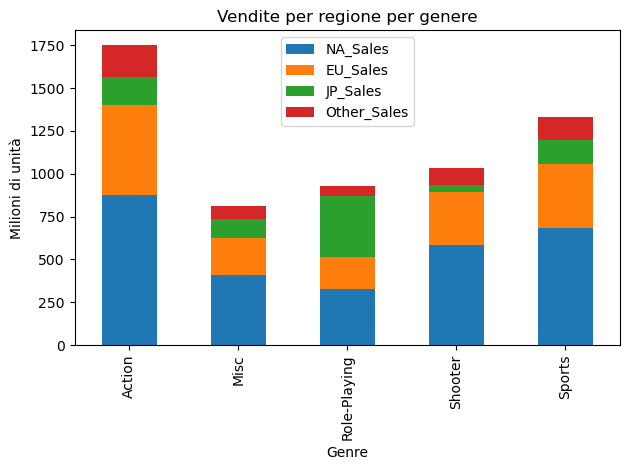


In [25]:
# Import dei pacchetti
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Caricamento del dataset
url = 'https://zenodo.org/record/5898311/files/vgsales.csv'
df = pd.read_csv(url)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [10]:
len(df['Name'].unique())

11493

<Axes: xlabel='Genre'>

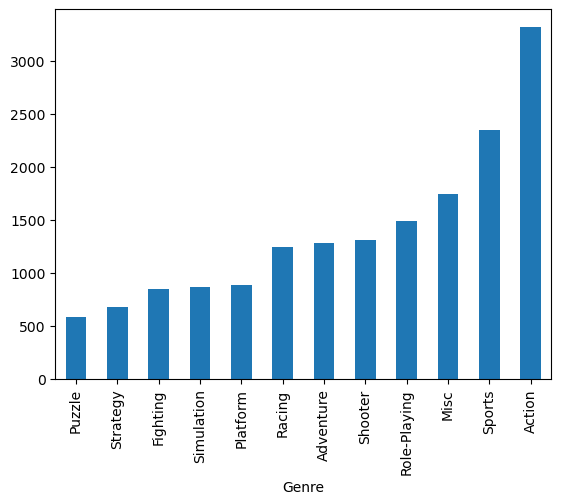

In [11]:
c=df.groupby('Genre')['Genre'].count().sort_values()
c.plot(kind='bar')


<Axes: xlabel='Year'>

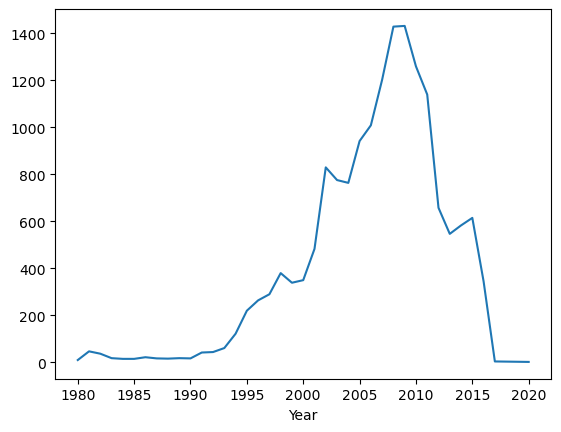

In [12]:
evol_time=df.groupby('Year')['Year'].count()
evol_time.plot(kind='line')

In [39]:
top_5=np.array(df.groupby('Genre')['Genre'].count().sort_values().tail(5).index)

pop_df = df[df['Genre'].isin(top_5)].groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
pop_df.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,877.83,525.00,159.95,187.38
Misc,410.24,215.98,107.76,75.32
Role-Playing,327.28,188.06,352.31,59.61
Shooter,582.60,313.27,38.28,102.69
Sports,683.35,376.85,135.37,134.97


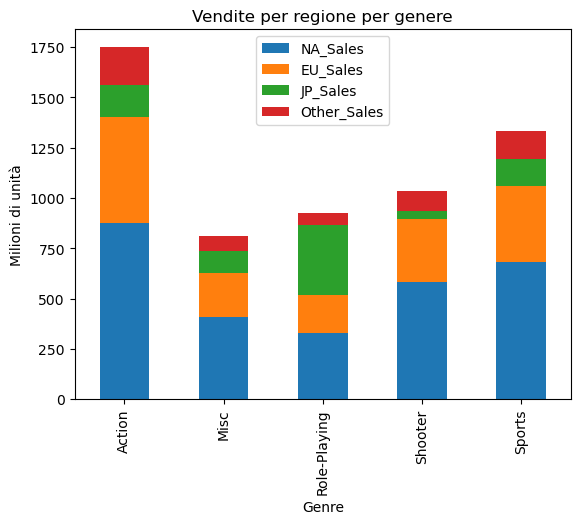

In [ ]:
pop_df.plot(kind='bar',stacked=True)
plt.title('Vendite per regione per genere')
plt.ylabel('Milioni di unità')
plt.legend(loc='upper center')
plt.show()